In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('dataset/diabetes.csv')


In [3]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {i: class_weights[i] for i in range(len(class_weights))}

In [16]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [20]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping, model_checkpoint], class_weight=class_weight)


Epoch 1/100


14/16 [=========================>....] - ETA: 0s - loss: 0.7598 - accuracy: 0.6183 

e:\ResearchRetina\New folder\envs\retinopathuy\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 37ms/step - loss: 0.7469 - accuracy: 0.6253 - val_loss: 0.6481 - val_accuracy: 0.7317
Epoch 2/100
16/16 [==============================] - 0s 15ms/step - loss: 0.6206 - accuracy: 0.6802 - val_loss: 0.6227 - val_accuracy: 0.7398
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6037 - accuracy: 0.6680 - val_loss: 0.6025 - val_accuracy: 0.7317
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6093 - accuracy: 0.6925 - val_loss: 0.5792 - val_accuracy: 0.7236
Epoch 5/100
16/16 [==============================] - 0s 18ms/step - loss: 0.5403 - accuracy: 0.7291 - val_loss: 0.5646 - val_accuracy: 0.7561
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5153 - accuracy: 0.7393 - val_loss: 0.5589 - val_accuracy: 0.7480
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5571 - accuracy: 0.7312 - val_loss: 0.5420 - val_accuracy: 0.7398
Epoch 8/100
16/16 [===

In [21]:
best_model = tf.keras.models.load_model('best_model.h5')


In [ ]:
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

5/5 [==============================] - 0s 3ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Test Accuracy: 0.7077922077922078
Precision: 0.5694444444444444
Recall: 0.7454545454545455
F1 Score: 0.6456692913385826


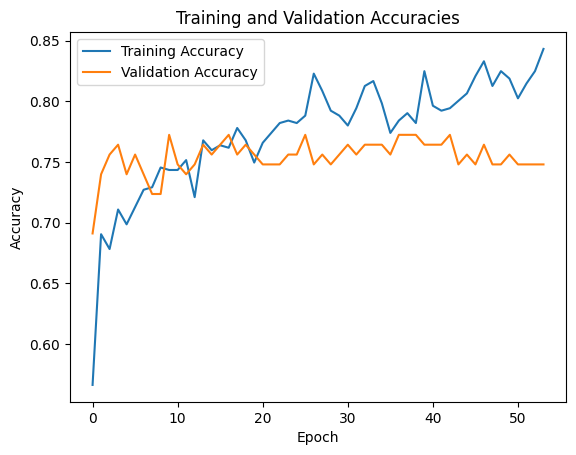

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

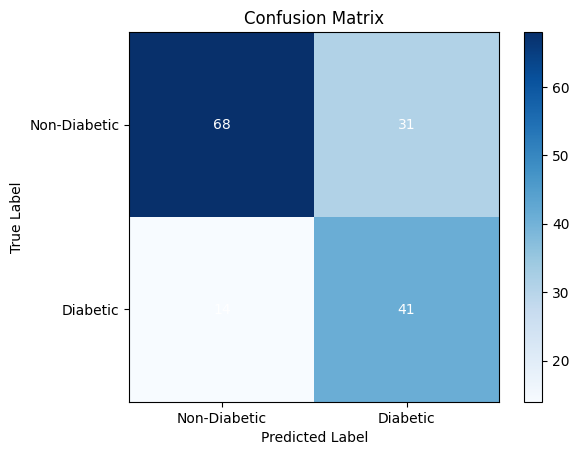

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.yticks([0, 1], ['Non-Diabetic', 'Diabetic'])
for i in range(len(conf_mat)):
    for j in range(len(conf_mat)):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='white')
plt.show()

In [24]:
import numpy as np
import tensorflow as tf

def load_and_predict(saved_model_path, new_data):

    tf.keras.backend.clear_session()

    loaded_model = tf.keras.models.load_model(saved_model_path)

    predictions = loaded_model.predict(new_data)

    return predictions

saved_model_path = 'best_model.h5'
new_data = np.array([[1,89,66,23,94,28.1,0.167,21]])
predictions = load_and_predict(saved_model_path, new_data)
print("Predictions:", predictions)

1/1 [==============================] - 0s 124ms/step
Predictions: [[1.]]
